In [75]:
import mmcv
from mmseg.datasets import build_dataset
import numpy as np

cfg_path = "config/CUSTM_Dataset.py"
cfg_path = "/home/akiyo/nfs/zhang/github/Swin-Transformer-Semantic-Segmentation/configs/_base_/datasets/msd.py"
cfg = mmcv.Config.fromfile(cfg_path)

train_dataset = build_dataset(cfg.data.train)
#val_dataset = build_dataset(cfg.data.val, dict(test_mode=True))

image_metas = []
image_list = []
annotation_list = []

count = 0

while count < 20:
    count += 1
    i = np.random.randint(0, len(train_dataset))
    image_metas.append(train_dataset[i]['img_metas'].data)
    image_list.append(train_dataset[i]['img'].data)
    annotation_list.append(train_dataset[i]['gt_semantic_seg'].data)
    if len(image_list) >= 20:
        break

print(len(image_metas), len(image_list), len(annotation_list))

2023-01-11 16:03:49,574 - mmseg - INFO - Loaded 484 images
2023-01-11 16:03:49,583 - mmseg - INFO - Loaded 244 images
2023-01-11 16:03:49,648 - mmseg - INFO - Loaded 1657 images
2023-01-11 16:03:49,676 - mmseg - INFO - Loaded 475 images


20 20 20


# Data Pipeline - Formatting

In [76]:
import torch
import numpy as np

for meta, i, a in zip(image_metas, image_list, annotation_list):
    #print(i.__dict__.keys(), a.__dict__.keys())
    #print(i.__dict__, a.__dict__)
    #print(meta)
    print(f"image: {type(i)}, {i.shape}-->[{i.min()}, {i.max()}]")
    print(f"annotation: {type(a)}, {a.shape}-->[{a.min()}, {a.max()}]")
    break

image: <class 'torch.Tensor'>, torch.Size([3, 512, 512])-->[-2.1179039478302, 2.5702831745147705]
annotation: <class 'torch.Tensor'>, torch.Size([1, 512, 512])-->[0, 255]


# Data Pipeline - Transforms

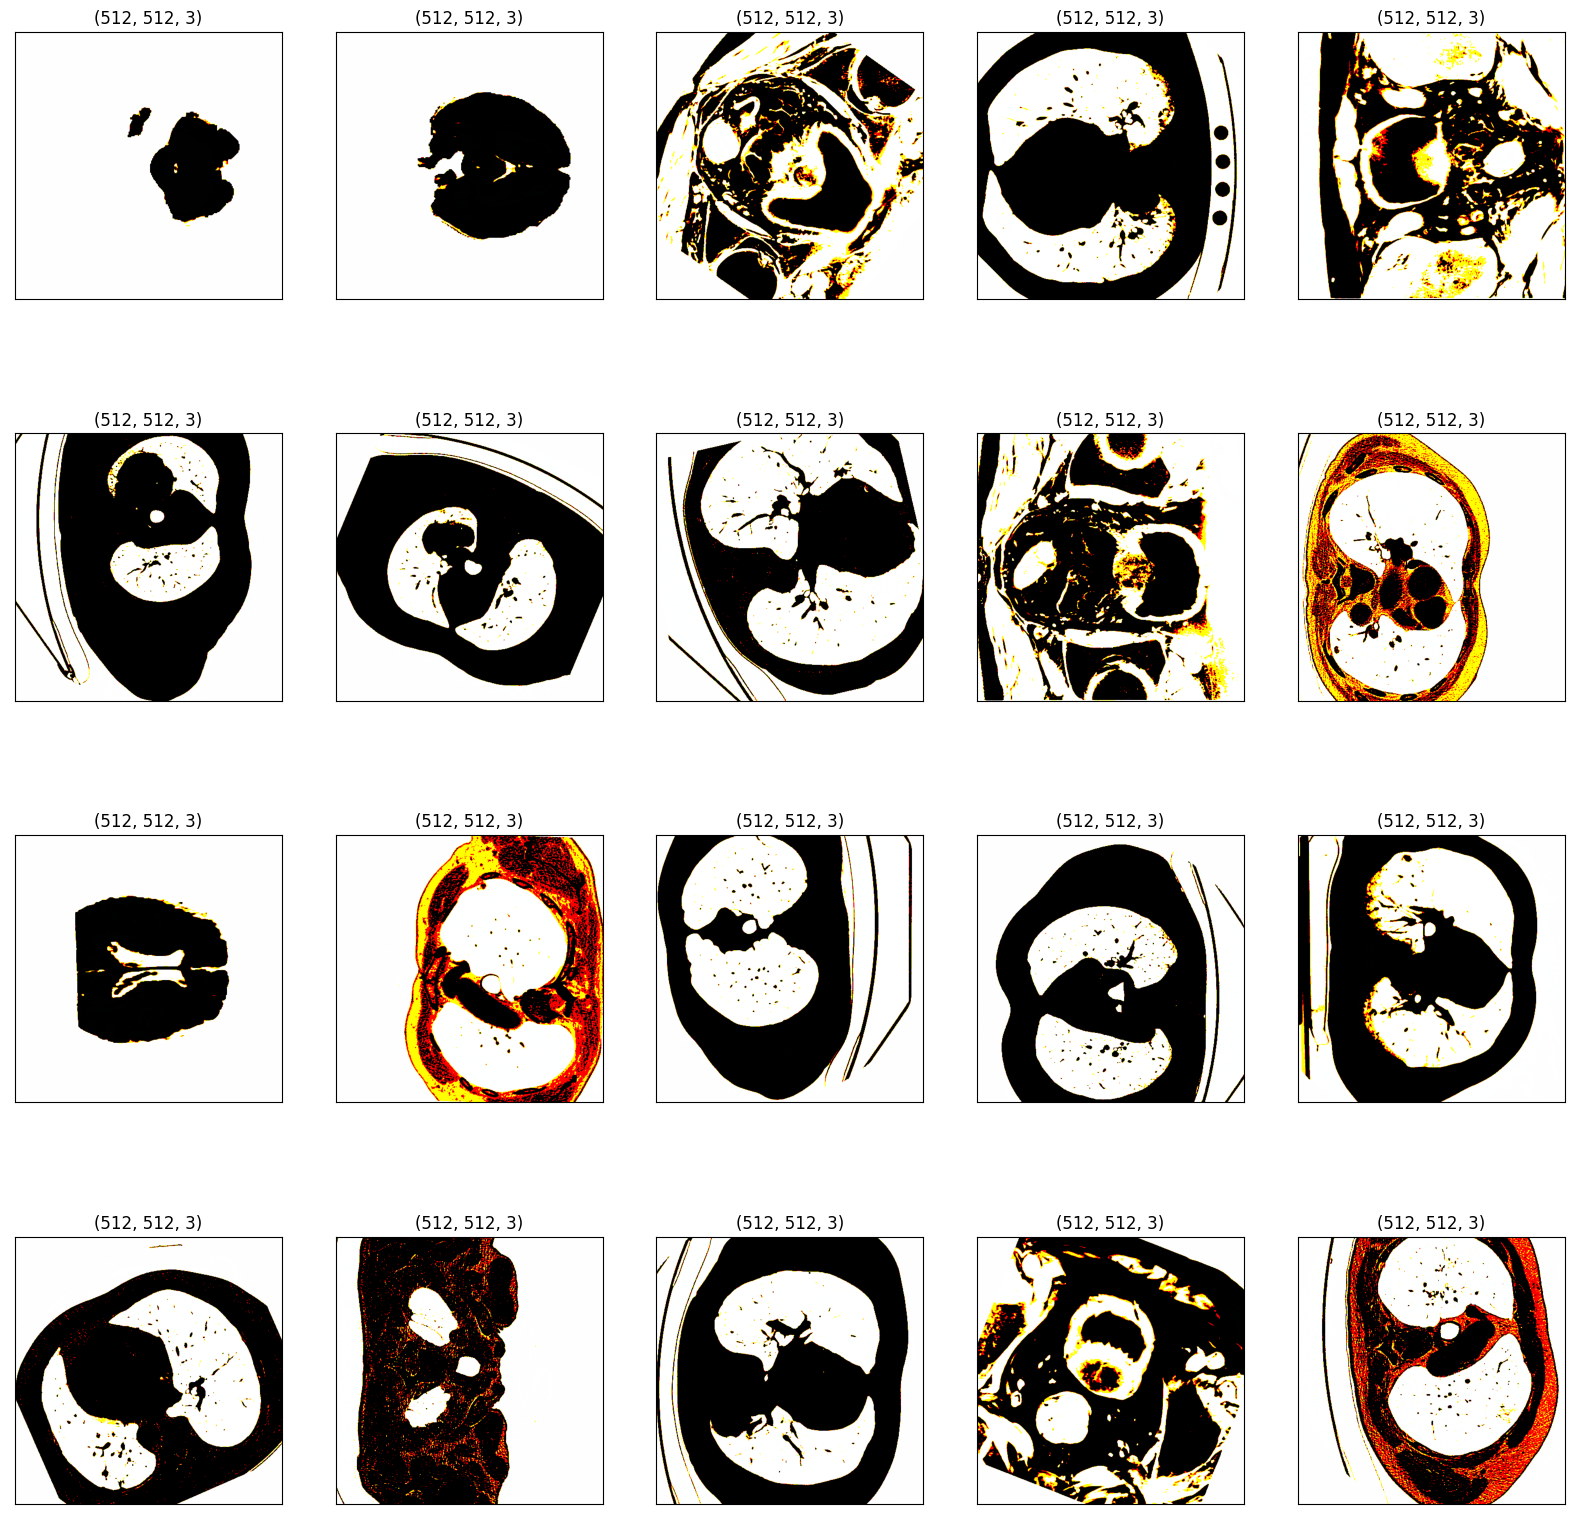

In [77]:
import mmcv
from mmseg.datasets import build_dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def show_images(image_list, row=None, col=None):
    fig = plt.figure(figsize=(20, 20))
    for i, image in enumerate(image_list):
        if row is None and col is not None:
            output_shape = (len(image_list)//col, col) 
        elif col is None and row is not None:
            output_shape = (row, len(image_list)//row)
        
        ax = fig.add_subplot(*output_shape, i+1)

        #print(image.shape, image.min(), image.max())
        if(image.ndim == 3):
            image = np.asarray(image, dtype=np.uint8)
            image = image.transpose(1, 2, 0) if image.shape[0] < 4 else image
            #image = image.astype(np.uint8)
            #image = mmcv.rgb2gray(image)
        
        ax.imshow(image, cmap='gray' if image.ndim == 2 else None)
        ax.set_title(image.shape)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    plt.show()

show_images(image_list, col=5)
#show_images(annotation_list, col=5)